# Gaussian processes - Roles of $r(\cdot,\cdot)$ and $\mu$

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import scipy.interpolate as interpolate
import scipy.stats as stats

def distances_all(xi,xj): return np.abs(xi[np.newaxis,:] - xj[:,np.newaxis])

In [34]:
N = 100
x = np.linspace(0,1,N)

sigma_0 = 0.5
def mu(x): return np.sin(5*x**2)
l=0.05
def r(xi,xj): return sigma_0**2 * np.exp(-distances_all(xi,xj)**2/ l**2)

In [35]:
mu_prior = mu(x)
P = r(x,x)

Text(0, 0.5, 'y')

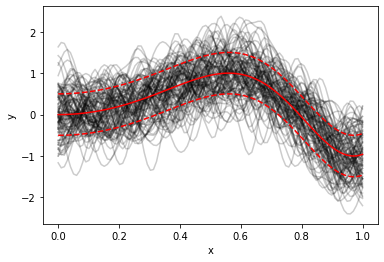

In [36]:
ys = stats.multivariate_normal(mu_prior, P, allow_singular=True).rvs(100)
for y in ys:
    plt.plot(x, y, '-', color='k', alpha=0.2)
sigma_prior = np.sqrt(np.diagonal(P))
plt.plot(x, mu_prior, '-r')
plt.plot(x, mu_prior + sigma_prior, '--r')
plt.plot(x, mu_prior - sigma_prior, '--r')
plt.xlabel('x')
plt.ylabel('y')

